# classify the Size_Categorie using SVM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report, precision_recall_fscore_support

import warnings
warnings.filterwarnings('ignore')

In [2]:
forest = pd.read_csv('forestfires.csv')
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
fores = forest.iloc[:,:10]

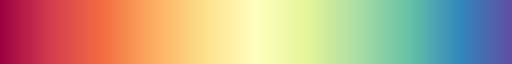

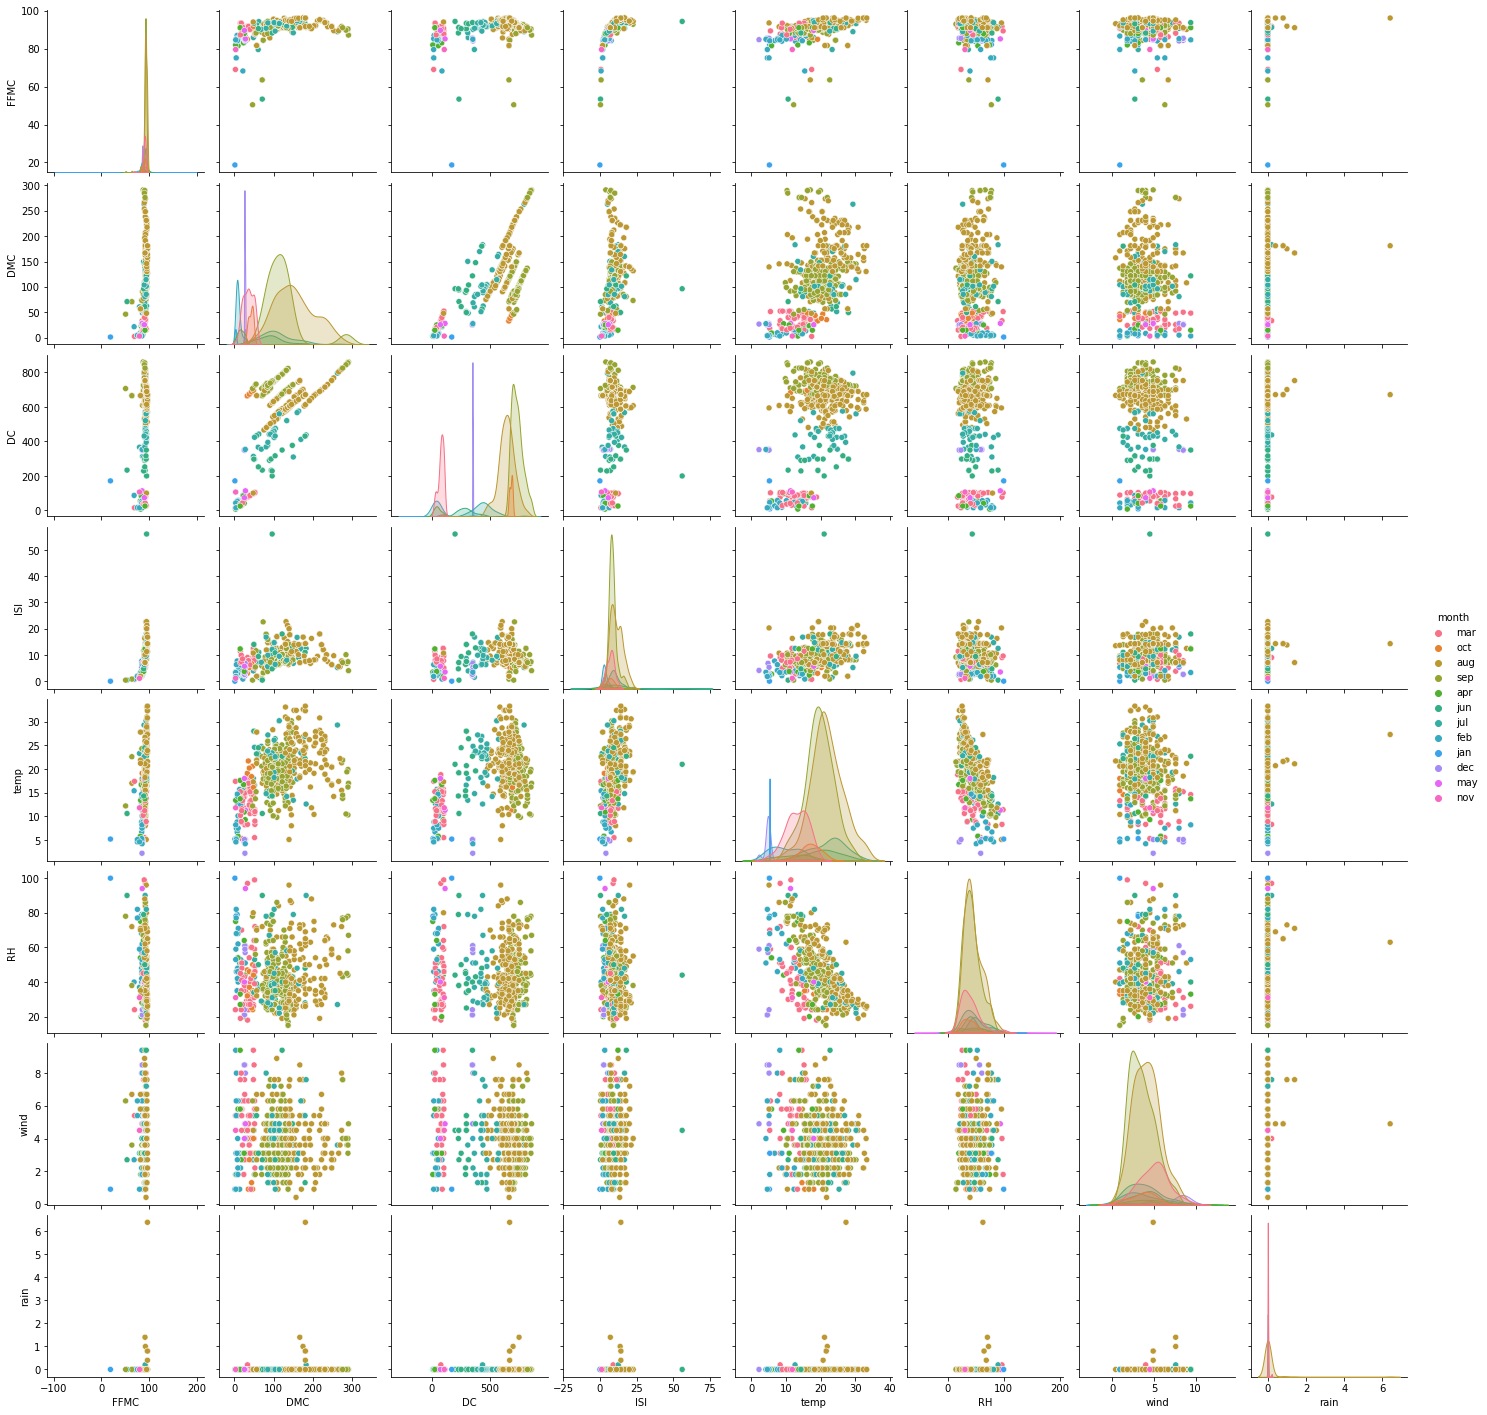

In [5]:
plt.rcParams['figure.figsize']=(20,15)
    
sns.pairplot(fores,hue="month")
sns.color_palette("Spectral", as_cmap=True)

<AxesSubplot:>

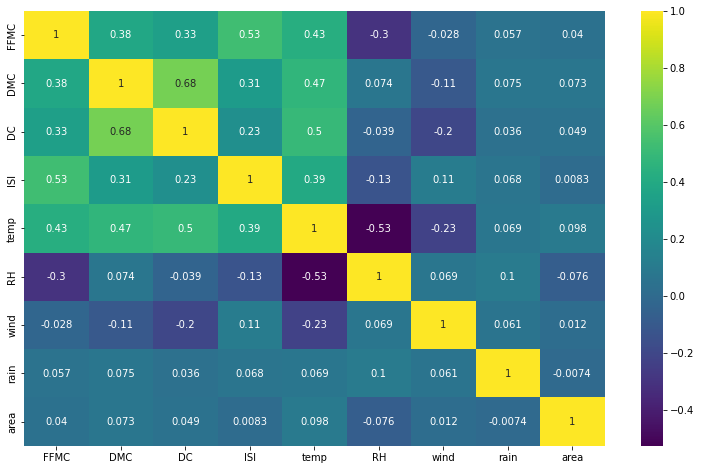

In [6]:
plt.rcParams['figure.figsize']=(13,8)
    
sns.heatmap(forest.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,30]].corr(), annot =True, cmap = 'viridis')

In [62]:
le = LabelEncoder()
forest['month'] = le.fit_transform(forest['month'])
forest['day'] = le.fit_transform(forest['day'])
forest['size_category'] = le.fit_transform(forest['size_category'])

In [63]:
X = forest.drop('size_category', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
forest_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [65]:
X.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],
      dtype='object')

In [66]:
forest_scaled

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
513,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
514,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
515,-1.089076,-0.383187,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081


In [67]:
X = forest_scaled
y = forest['size_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
X.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],
      dtype='object')

In [69]:
X_train

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
386,1.199754,0.136781,-0.026235,-0.221496,0.817347,0.522130,0.294920,0.657098,0.772325,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268
56,1.199754,1.176715,-0.062501,-0.471557,0.735435,-0.597503,-0.187755,1.147845,0.492982,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268
457,-1.089076,1.696682,0.191362,1.258549,0.354926,-0.268199,0.174251,0.350381,-0.009834,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
60,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.273773,-0.324396,0.995798,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.17286,-0.706081
229,-1.089076,-0.383187,0.282028,-0.454365,-0.270916,0.631898,-0.429092,-0.079023,-0.009834,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.284222,-1.423121,0.100697,-0.977929,-1.816354,0.763619,-0.532523,-1.060516,2.001430,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.17286,-0.706081
277,-0.860193,-0.903154,-0.951024,-1.335829,-0.799916,-1.409785,-2.463222,-1.428577,2.504247,-0.073268,...,7.512952,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
9,1.199754,-0.383187,0.336427,-0.357467,0.607926,-0.421874,0.674164,-0.263053,-0.009834,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268
359,1.199754,-1.423121,0.336427,0.173912,0.975522,0.258687,0.381112,-0.324396,-1.015466,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268


In [70]:
X_test

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
213,0.284222,-0.903154,-0.552096,-0.916977,-1.792143,-0.882899,-1.359965,0.105008,0.995798,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.17286,-0.706081
435,-0.173544,-0.383187,0.028164,-0.409042,-0.691372,-0.751178,0.846548,0.411724,-1.238940,-0.073268,...,-0.133103,-0.200603,-0.062318,3.893103,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
343,1.199754,-0.903154,0.155096,0.300505,1.045733,-0.334060,-0.515284,0.411724,0.269509,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268
230,1.199754,1.696682,0.408960,0.350517,0.611961,0.039151,1.294746,-1.428577,0.269509,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268
171,-1.089076,1.696682,-0.914758,-0.319958,0.248803,-0.531642,-0.256709,0.350381,-0.009834,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.199754,-0.383187,0.499625,0.539625,0.699926,-0.202338,1.846375,-1.060516,-0.736124,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268
49,0.284222,-0.903154,-0.552096,-0.916977,-1.792143,-0.882899,-1.359965,0.105008,0.995798,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.17286,-0.706081
100,-1.089076,0.136781,0.136963,0.492739,0.215716,0.346501,0.157013,-0.324396,0.772325,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
153,1.199754,-1.423121,0.662824,-0.402790,0.582505,1.510041,0.208728,0.166351,0.492982,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268


In [71]:
y_train

386    0
56     1
457    0
60     1
229    0
      ..
70     1
277    0
9      1
359    0
192    0
Name: size_category, Length: 413, dtype: int64

In [72]:
y_test

213    0
435    1
343    1
230    0
171    1
      ..
154    1
49     1
100    1
153    1
250    1
Name: size_category, Length: 104, dtype: int64

In [73]:
parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
svm = SVC()
clf = GridSearchCV(svm, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']})

In [75]:
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)

Confusion Matrix:
 [[24  6]
 [ 1 73]]


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        30
           1       0.92      0.99      0.95        74

    accuracy                           0.93       104
   macro avg       0.94      0.89      0.91       104
weighted avg       0.93      0.93      0.93       104



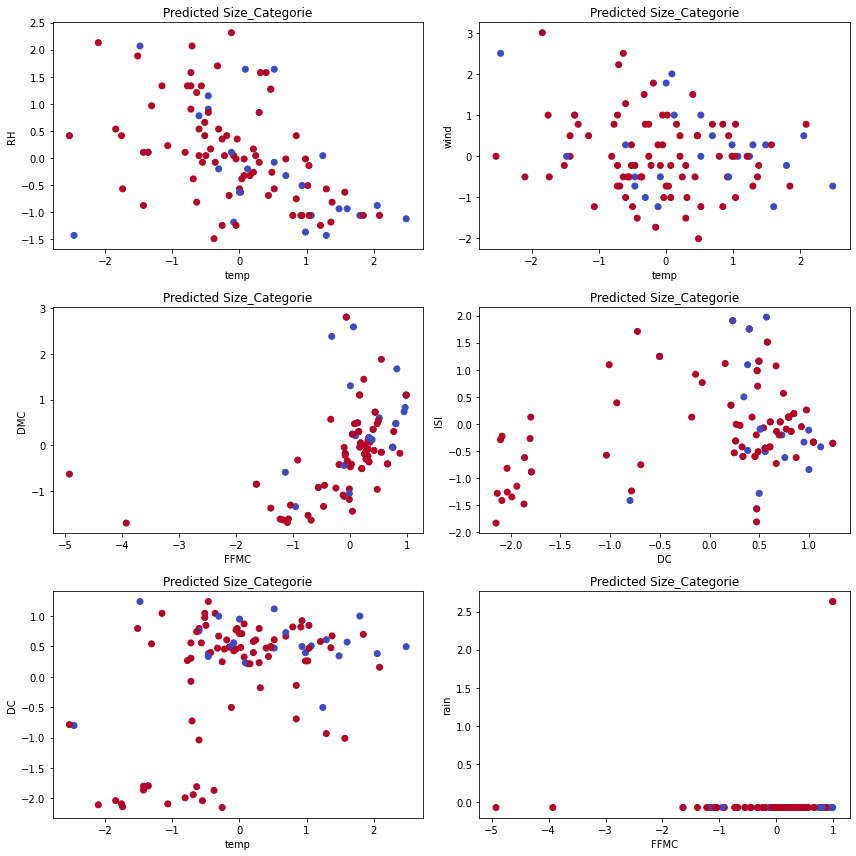

In [82]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

vars = [['temp', 'RH'], ['temp', 'wind'], ['FFMC', 'DMC'], ['DC', 'ISI'], ['temp', 'DC'], ['FFMC', 'rain']]
titles = ['Predicted Size_Categorie', 'Predicted Size_Categorie', 'Predicted Size_Categorie', 'Predicted Size_Categorie', 'Predicted Size_Categorie', 'Predicted Size_Categorie']

for i, var in enumerate(vars):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(X_test[var[0]], X_test[var[1]], c=y_pred, cmap='coolwarm')
    axs[row, col].set_xlabel(var[0])
    axs[row, col].set_ylabel(var[1])
    axs[row, col].set_title(titles[i])

plt.tight_layout()
plt.show()


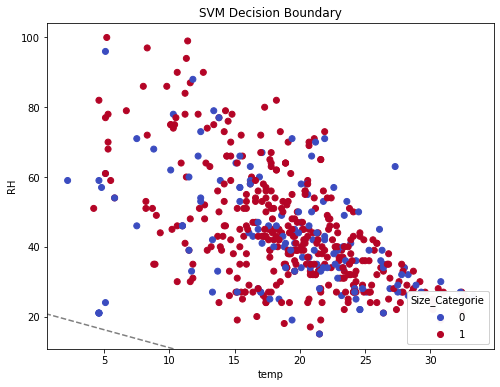

In [83]:
X = forest[['temp', 'RH']]
y = forest['size_category']

clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X['temp'], X['RH'], c=y, cmap='coolwarm')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 10)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.set_xlabel('temp')
ax.set_ylabel('RH')
ax.set_title('SVM Decision Boundary')

legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Size_Categorie")
ax.add_artist(legend)

plt.show()

# Prepare a classification model using SVM for salary data

In [177]:
SalaryData_Train = pd.read_csv("SalaryData_Train(1).csv")
SalaryData_Test = pd.read_csv("SalaryData_Test(1).csv")

In [3]:
SalaryData_Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
SalaryData_Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
SalaryData_Train.shape

(30161, 14)

In [6]:
SalaryData_Test.shape

(15060, 14)

In [7]:
SalaryData_Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
SalaryData_Test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [9]:
SalaryData_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
SalaryData_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
SalaryData_Train.(kind = "box")

In [ ]:
SalaryData_Test.(kind = "box")

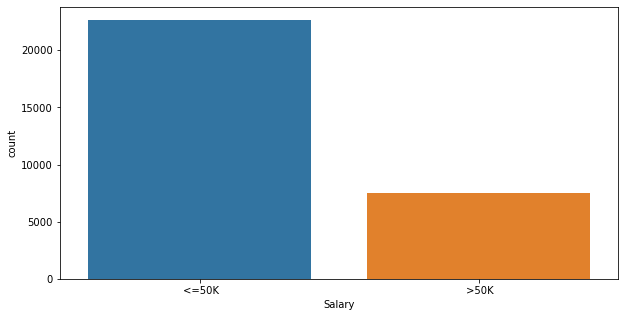

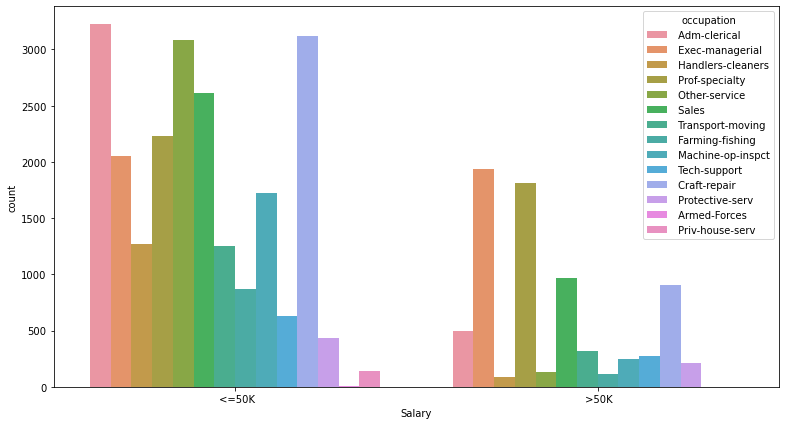

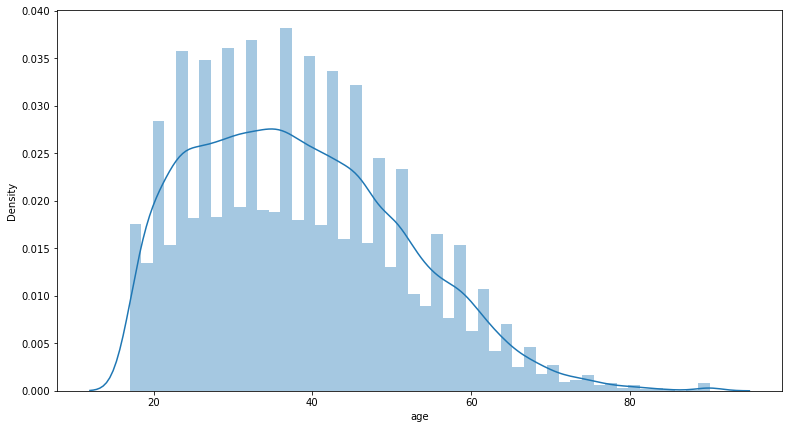

<module 'matplotlib.pyplot' from 'C:\\Users\\jaevi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

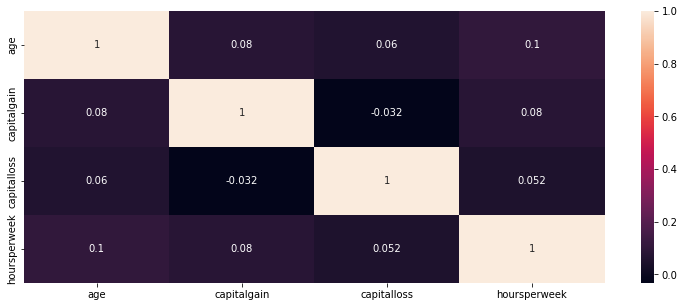

In [30]:
plt.rcParams['figure.figsize'] = (10,5)

sns.countplot(SalaryData_Train['Salary'])
plt.show()

plt.rcParams['figure.figsize'] = (13,7)
sns.countplot(SalaryData_Train['Salary'], hue="occupation", data = SalaryData_Train)
plt.show()

sns.distplot(SalaryData_Train['age'])
plt.show()

plt.rcParams['figure.figsize'] = (13,5)
sns.heatmap(SalaryData_Train[['age', 'capitalgain', 'capitalloss', 'hoursperweek']].corr(), annot=True)
plt

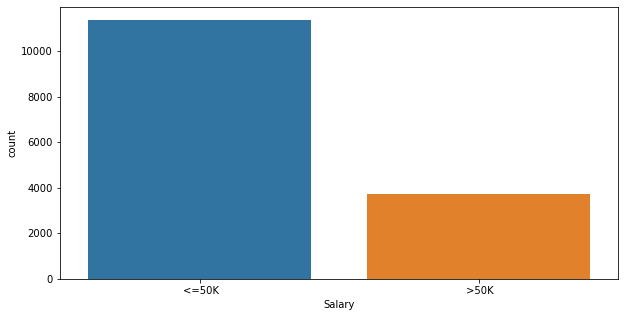

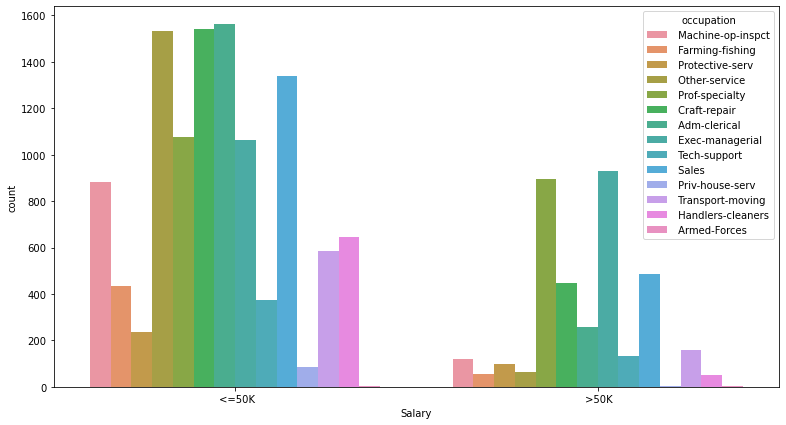

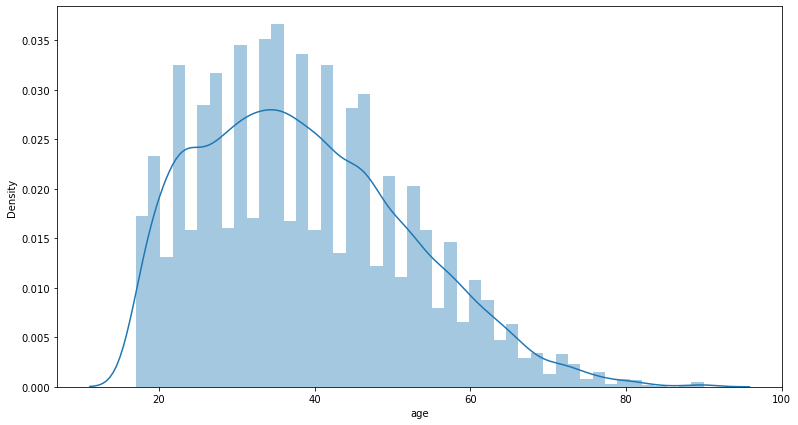

<module 'matplotlib.pyplot' from 'C:\\Users\\jaevi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

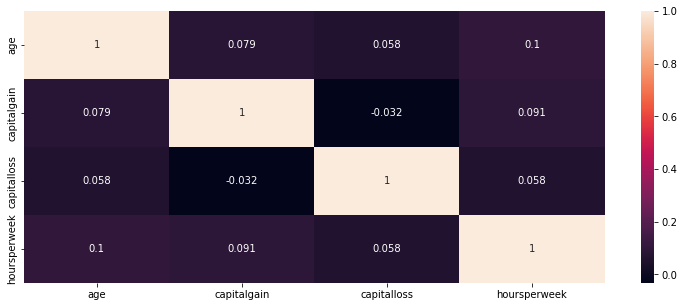

In [31]:
plt.rcParams['figure.figsize'] = (10,5)

sns.countplot(SalaryData_Test['Salary'])
plt.show()

plt.rcParams['figure.figsize'] = (13,7)
sns.countplot(SalaryData_Test['Salary'], hue="occupation", data = SalaryData_Test)
plt.show()

sns.distplot(SalaryData_Test['age'])
plt.show()

plt.rcParams['figure.figsize'] = (13,5)
sns.heatmap(SalaryData_Test[['age', 'capitalgain', 'capitalloss', 'hoursperweek']].corr(), annot=True)
plt

In [178]:
cat_cols = ['workclass', 'education', 'occupation', 'sex']

In [179]:
SalaryData_Train.drop(columns=['educationno', 'maritalstatus','relationship','race', 'capitalgain','capitalloss','native'], inplace=True)

In [180]:
SalaryData_Test.drop(columns=['educationno', 'maritalstatus','relationship','race', 'capitalgain','capitalloss','native'], inplace=True)

In [181]:
SalaryData_Test.head()

,age,workclass,education,occupation,sex,hoursperweek,Salary
0,25,Private,11th,Machine-op-inspct,Male,40,<=50K
1,38,Private,HS-grad,Farming-fishing,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,Protective-serv,Male,40,>50K
3,44,Private,Some-college,Machine-op-inspct,Male,40,>50K
4,34,Private,10th,Other-service,Male,30,<=50K


In [182]:
from sklearn.preprocessing import OneHotEncoder

In [183]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(SalaryData_Train[cat_cols])
enc.fit(SalaryData_Test[cat_cols])

OneHotEncoder(handle_unknown='ignore')

In [184]:
train_enc = pd.DataFrame(enc.transform(SalaryData_Train[cat_cols]).toarray(), columns=enc.get_feature_names(cat_cols))
test_enc = pd.DataFrame(enc.transform(SalaryData_Test[cat_cols]).toarray(), columns=enc.get_feature_names(cat_cols))

In [185]:
train_enc

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,sex_ Female,sex_ Male
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
30157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [186]:
train_processed = pd.concat([SalaryData_Train.drop(cat_cols, axis=1), train_enc], axis=1)
test_processed = pd.concat([SalaryData_Test.drop(cat_cols, axis=1), test_enc], axis=1)

In [187]:
X_train = train_processed.drop('Salary', axis=1)
y_train = train_processed['Salary']

In [188]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [189]:
X_train

,age,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,sex_ Female,sex_ Male
26840,55,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23346,26,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
27598,31,30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15646,27,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7455,40,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,66,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19648,26,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9845,50,45,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10799,49,60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [190]:
y_train

26840      >50K
23346     <=50K
27598     <=50K
15646     <=50K
7455      <=50K
          ...  
13123     <=50K
19648     <=50K
9845      <=50K
10799      >50K
2732      <=50K
Name: Salary, Length: 24128, dtype: object

In [191]:
X_test = test_processed.drop('Salary', axis=1)
y_test = test_processed['Salary']

In [192]:
_ , X_test, _, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=0)

In [193]:
X_test

,age,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,sex_ Female,sex_ Male
4269,37,60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7027,61,38,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8418,41,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10064,23,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3305,29,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,21,35,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2152,24,60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5979,47,28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5386,41,96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [194]:
y_test

4269      <=50K
7027      <=50K
8418      <=50K
10064     <=50K
3305       >50K
          ...  
3032      <=50K
2152       >50K
5979      <=50K
5386      <=50K
3267      <=50K
Name: Salary, Length: 3012, dtype: object

In [197]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [200]:
X_train_scaled

array([[ 1.26277048, -0.08236974, -0.17861938, ..., -0.23394411,
        -0.69522621,  0.69522621],
       [-0.94767176, -0.08236974, -0.17861938, ..., -0.23394411,
         1.43838076, -1.43838076],
       [-0.56656103, -0.9214026 , -0.17861938, ..., -0.23394411,
         1.43838076, -1.43838076],
       ...,
       [ 0.88165974,  0.33714669, -0.17861938, ..., -0.23394411,
        -0.69522621,  0.69522621],
       [ 0.8054376 ,  1.59569597, -0.17861938, ..., -0.23394411,
        -0.69522621,  0.69522621],
       [-0.33789459, -0.50188617, -0.17861938, ..., -0.23394411,
        -0.69522621,  0.69522621]])

In [201]:
X_test_scaled

array([[-0.14010792,  1.5836151 , -0.17849433, ..., -0.21577792,
        -0.69131724,  0.69131724],
       [ 1.66622727, -0.25670112, -0.17849433, ..., -0.21577792,
         1.4465139 , -1.4465139 ],
       [ 0.16094794, -0.42400259, -0.17849433, ..., -0.21577792,
        -0.69131724,  0.69131724],
       ...,
       [ 0.61253174, -1.09320849, -0.17849433, ..., -0.21577792,
         1.4465139 , -1.4465139 ],
       [ 0.16094794,  4.59504164, -0.17849433, ..., -0.21577792,
        -0.69131724,  0.69131724],
       [-1.49485932, -0.08939964, -0.17849433, ..., -0.21577792,
        -0.69131724,  0.69131724]])

In [209]:
n = 5000

X_train_scaled = X_train_scaled[:n]
y_train = y_train[:n]

X_test_scaled = X_test_scaled[:n]
y_test = y_test[:n]

In [217]:
svm_model = SVC(kernel='rbf', C=100, gamma=0.1)
svm_model.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.1)

In [222]:
svm_model.score(X_train_scaled, y_train)

0.8922

In [219]:
y_pred = svm_model.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       <=50K       0.84      0.89      0.86      2249
        >50K       0.60      0.51      0.55       763

    accuracy                           0.79      3012
   macro avg       0.72      0.70      0.71      3012
weighted avg       0.78      0.79      0.78      3012



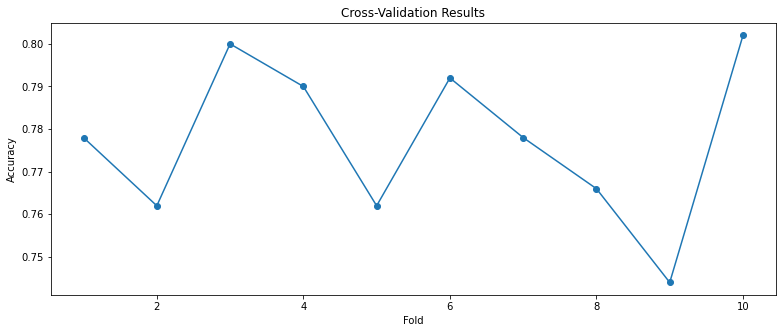

In [234]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=10)

plt.plot(range(1, 11), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results')
plt.show()

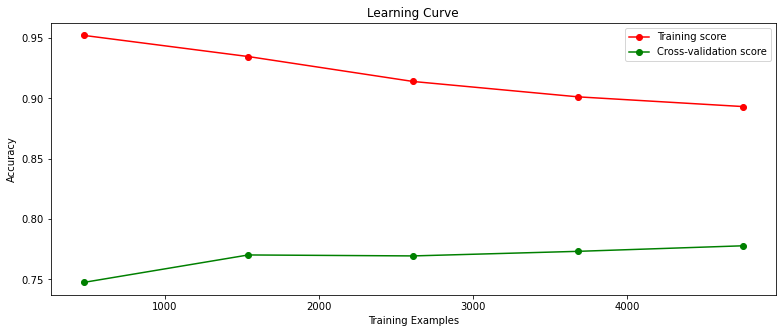

In [253]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(svm_model, X_train_scaled, y_train, cv=20)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


In [246]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

In [247]:
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': [0.01, 0.1, 1]
}

In [228]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [0.01, 0.1, 1],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [229]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best score: 0.8076000000000001


In [230]:
y_pred = grid_search.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.83      0.93      0.88      2249
        >50K       0.69      0.44      0.54       763

    accuracy                           0.81      3012
   macro avg       0.76      0.69      0.71      3012
weighted avg       0.80      0.81      0.79      3012



In [243]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [0.01, 0.1, 1],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [244]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best score: 0.8044001043728829


In [248]:
grid_search = GridSearchCV(pipeline, param_grid, cv=7, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [0.01, 0.1, 1],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [249]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best score: 0.805999602638258


In [250]:
y_pred = grid_search.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.83      0.93      0.88      2249
        >50K       0.69      0.44      0.54       763

    accuracy                           0.81      3012
   macro avg       0.76      0.69      0.71      3012
weighted avg       0.80      0.81      0.79      3012



              precision    recall  f1-score   support

       <=50K       0.83      0.93      0.88      2249
        >50K       0.69      0.44      0.54       763

    accuracy                           0.81      3012
   macro avg       0.76      0.69      0.71      3012
weighted avg       0.80      0.81      0.79      3012



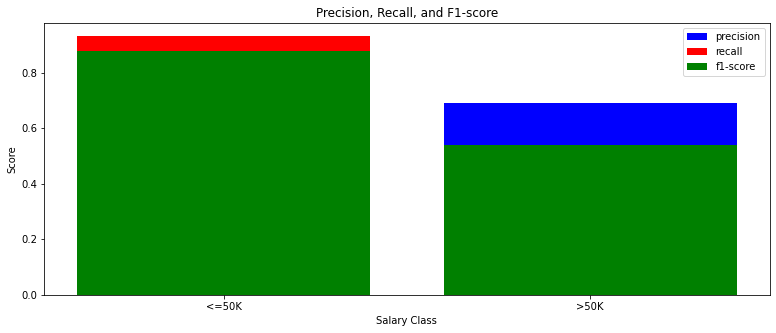

In [251]:
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

plt.figure()
plt.bar(['<=50K', '>50K'], precision, color='blue', label='precision')
plt.bar(['<=50K', '>50K'], recall, color='red', label='recall')
plt.bar(['<=50K', '>50K'], f1_score, color='green', label='f1-score')
plt.xlabel('Salary Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score')
plt.legend()
plt.show()